In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import fitparse

In [2]:
def parseFitFile(file_path):
    
    fitfile = fitparse.FitFile(file_path)
    
    series = []
    
    for record in fitfile.get_messages("record"):

        row = {
            'altitude': np.NAN,
            'cadence': np.NAN,
            'distance': np.NAN,
            'heart_rate': np.NAN,
            'power': np.NAN,
            'speed': np.NAN,
            'timestamp': np.NAN
        }
        for data in record:
            if data.name in ['altitude','cadence','distance','heart_rate','power','speed','timestamp']:
                row[data.name] = data.value

        if row['timestamp']:
            series += [row]
            
    df = pd.DataFrame(series)
#     df = df.set_index('timestamp')
    
    return df

In [3]:
FILE_FORMAT = "../Downloads/tdz-stage{}.fit"
dfs = {}
for i in range(1,9):
    f = FILE_FORMAT.format(i)
    ride = "TDZ-{}".format(i)
    print(f)
    dfs[ride] = parseFitFile(f)

../Downloads/tdz-stage1.fit
../Downloads/tdz-stage2.fit
../Downloads/tdz-stage3.fit
../Downloads/tdz-stage4.fit
../Downloads/tdz-stage5.fit
../Downloads/tdz-stage6.fit
../Downloads/tdz-stage7.fit
../Downloads/tdz-stage8.fit


In [4]:
# dfs

<AxesSubplot:>

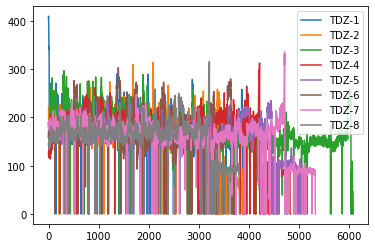

In [5]:
power = {}
for key in dfs:
    power[key] = dfs[key]['power']
    
powerDF = pd.DataFrame(power)
powerDF.plot()

<AxesSubplot:>

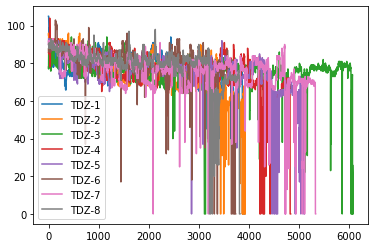

In [6]:
cadence = {}
for key in dfs:
    cadence[key] = dfs[key]['cadence']
    
cadenceDF = pd.DataFrame(cadence)
cadenceDF.plot()

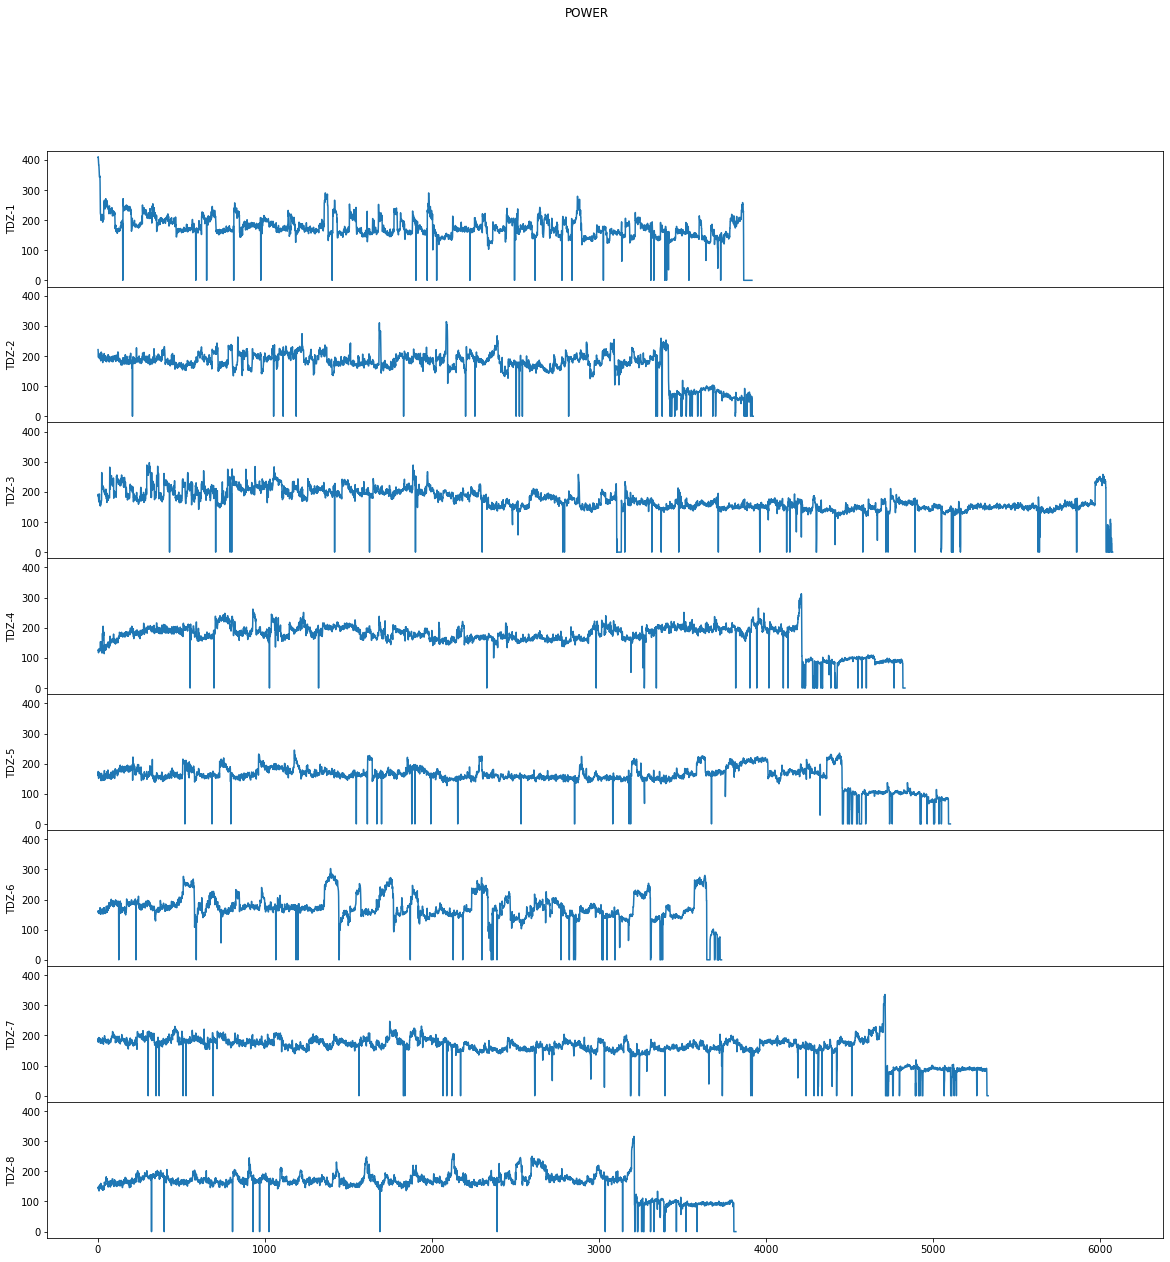

In [7]:
num_plots = len(dfs)

fig, axs = plt.subplots(num_plots, sharex=True, sharey=True, gridspec_kw={'hspace': 0})
fig.set_size_inches(20, 20)
fig.suptitle('POWER')

i = 0
for key in dfs:
    axs[i].plot(dfs[key].power)
    axs[i].set(ylabel=key)
    i+=1

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

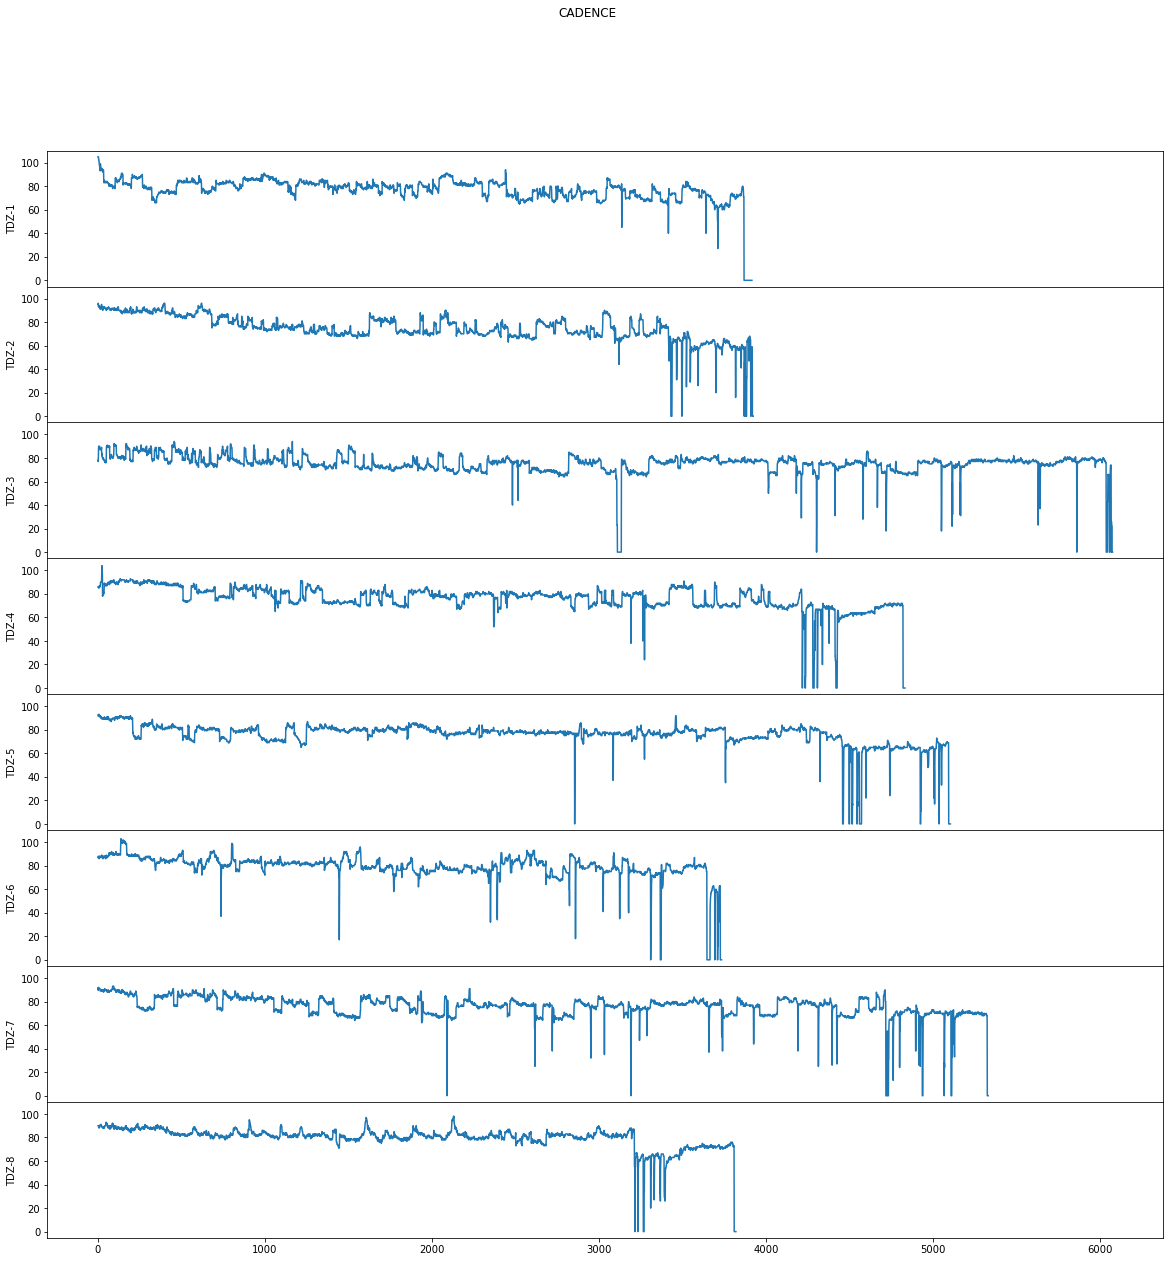

In [8]:
num_plots = len(dfs)

fig, axs = plt.subplots(num_plots, sharex=True, sharey=True, gridspec_kw={'hspace': 0})
fig.set_size_inches(20, 20)
fig.suptitle('CADENCE')

i = 0
for key in dfs:
    axs[i].plot(dfs[key].cadence)
    axs[i].set(ylabel=key)
    i+=1

# Hide x labels and tick labels for all but bottom plot.
for ax in axs:
    ax.label_outer()

<AxesSubplot:>

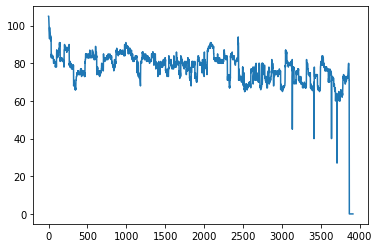

In [11]:
cadenceDF['TDZ-1'].plot()

In [13]:
!pip install tsmoothie

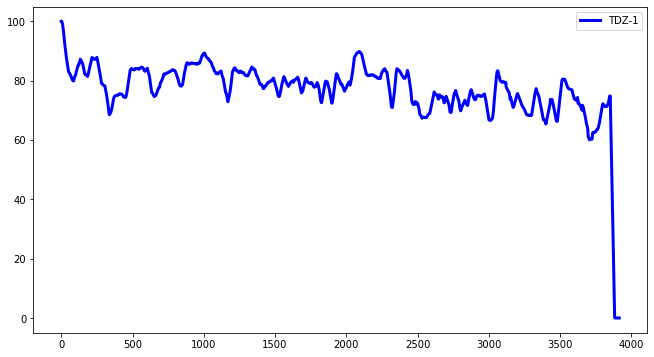

In [22]:
# https://stackoverflow.com/a/63575467
from tsmoothie.smoother import *

y = cadenceDF['TDZ-1'].dropna()

# operate smoothing
smoother = ConvolutionSmoother(window_len=30, window_type='ones')
smoother.smooth(y)

# plot the smoothed timeseries with intervals
plt.figure(figsize=(11,6))
plt.plot(smoother.smooth_data[0], linewidth=3, color='blue', label='TDZ-1')
plt.legend()
plt.show()

In [23]:
import matplotlib.cm as cm

In [28]:
for color in cm.tab10(np.linspace(0, 1, 8)):
    print(color)

[0.12156863 0.46666667 0.70588235 1.        ]
[1.         0.49803922 0.05490196 1.        ]
[0.17254902 0.62745098 0.17254902 1.        ]
[0.58039216 0.40392157 0.74117647 1.        ]
[0.54901961 0.3372549  0.29411765 1.        ]
[0.49803922 0.49803922 0.49803922 1.        ]
[0.7372549  0.74117647 0.13333333 1.        ]
[0.09019608 0.74509804 0.81176471 1.        ]


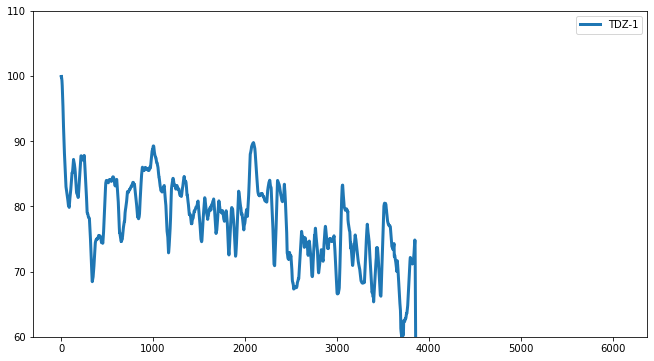

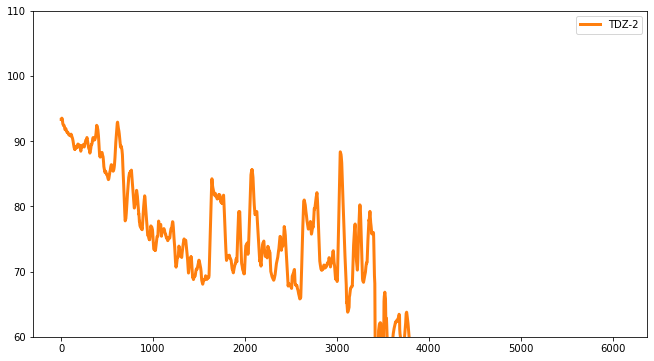

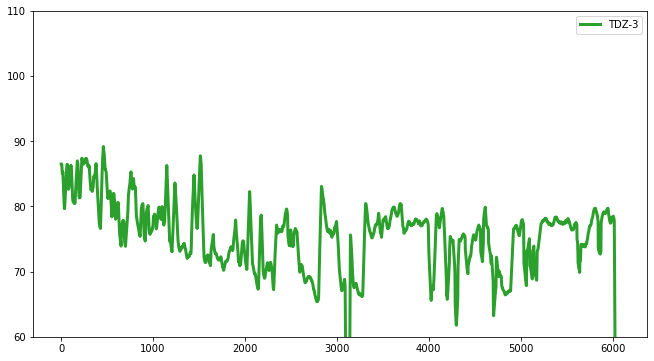

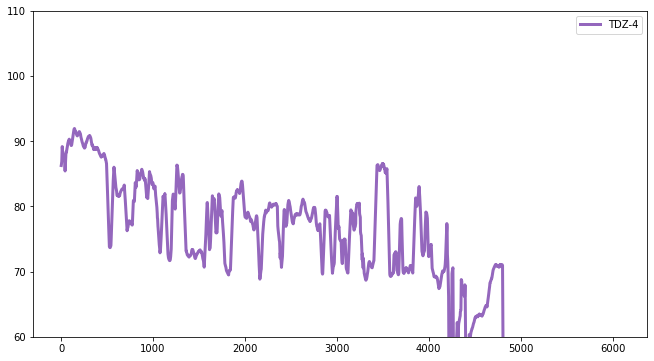

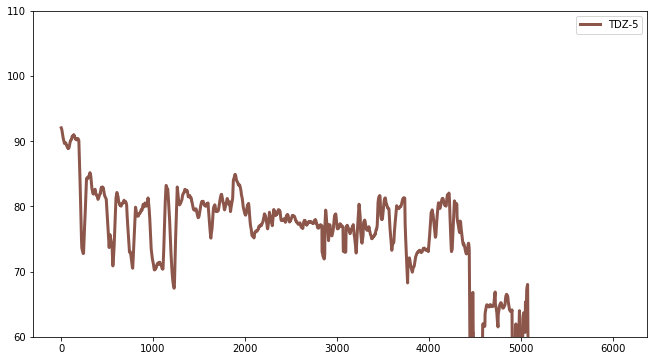

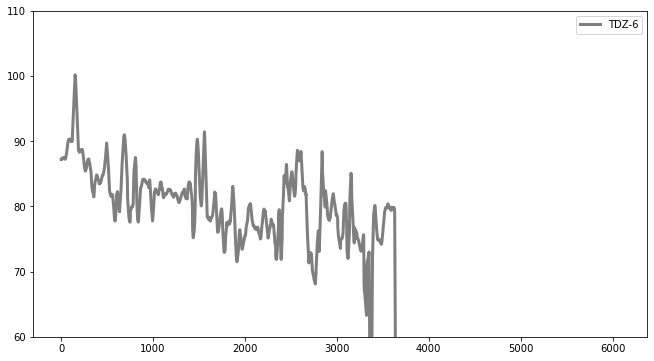

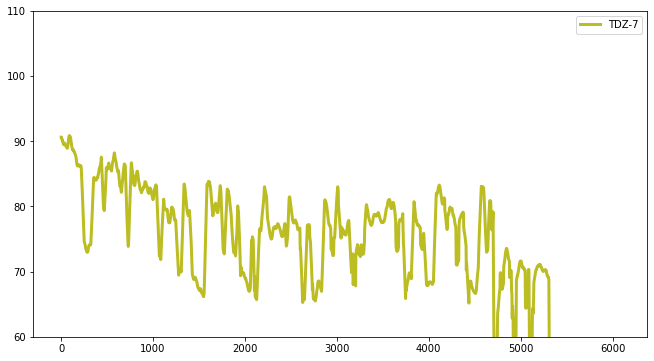

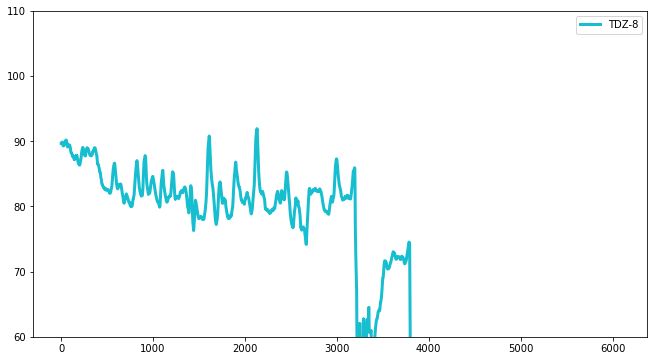

In [33]:
color = cm.tab10(np.linspace(0, 1, 8))

i = 0
for key in dfs:
    
    y = cadenceDF[key].fillna(0)

    # operate smoothing
    smoother = ConvolutionSmoother(window_len=30, window_type='ones')
    smoother.smooth(y)

    # plot the smoothed timeseries with intervals
    plt.figure(figsize=(11,6))
    plt.plot(smoother.smooth_data[0], linewidth=3, color=color[i], label=key)
    plt.legend()
    plt.ylim([60,110])
    plt.show()
    i+=1

In [108]:
def plotParameter(dfs, parameter,ylim):
    num_plots = len(dfs)
    color = cm.tab10(np.linspace(0, 1, num_plots))

    fig, axs = plt.subplots(num_plots, sharex=True, sharey=True, gridspec_kw={'hspace': 0})
    fig.set_size_inches(20, 20)

    i = 0
    for key in dfs:
        
        x = dfs[key].index
        y = dfs[key][parameter]
        
        y2 = y.fillna(0)
                
        # https://stackoverflow.com/a/26447505
        z = np.polyfit(x,y, 1)
        p = np.poly1d(z)

        
        # operate smoothing
        smoother = ConvolutionSmoother(window_len=30, window_type='ones')
        smoother.smooth(y2)
        
        axs[i].plot(smoother.smooth_data[0],linewidth=3, label=key,color=color[i])
        axs[i].plot(x,p(x),"r--",label="y=%.6fx+(%.6f)"%(z[0],z[1]))
        
        axs[i].legend()
        i+=1

    # Hide x labels and tick labels for all but bottom plot.
    for ax in axs:
        ax.label_outer()
    plt.ylim(ylim)

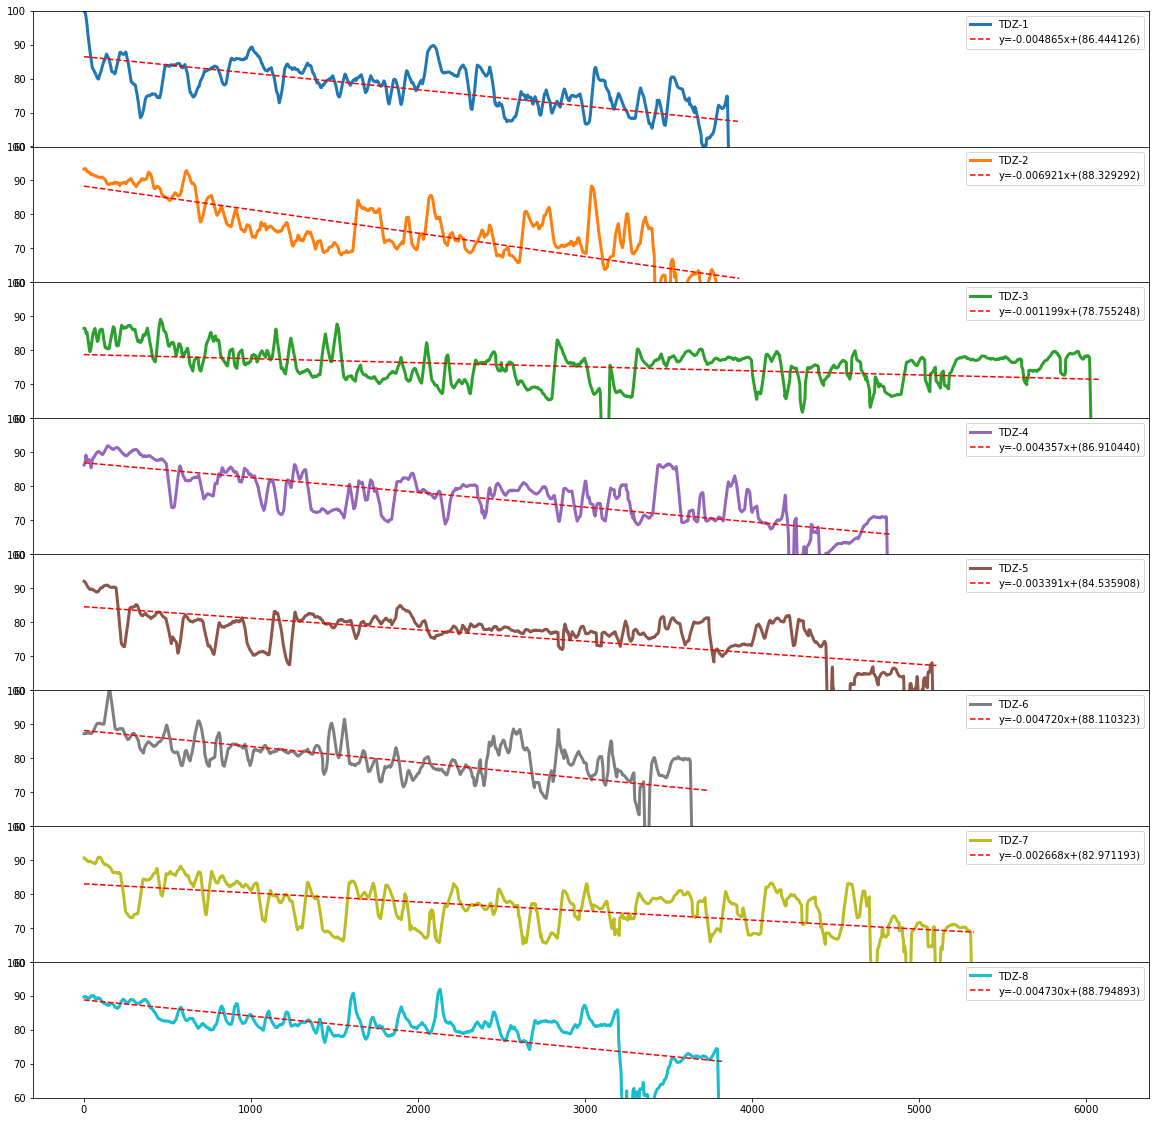

In [109]:
plotParameter(dfs,'cadence',[60,100])

In [49]:
cadence = {}
for key in dfs:
    cadence[key] = dfs[key]['cadence']
    
cadenceDF = pd.DataFrame(cadence)
# cadenceDF.plot()

In [81]:
for key in dfs:
    y = cadenceDF[key].fillna(0)
    
    # operate smoothing
    smoother = ConvolutionSmoother(window_len=30, window_type='ones')
    smoother.smooth(y)
    
    cadenceDF[key] = smoother.smooth_data[0]
    
    cadenceDF.loc[cadenceDF[key]==0, key] = np.NAN
    
#     print(key, len(cadence[key]))

    
# cadenceDF = pd.DataFrame(cadence)
# cadenceDF.plot()

In [64]:
# cadenceDF.loc[cadenceDF['TDZ-1'] == 0,'TDZ-1'] = np.NAN

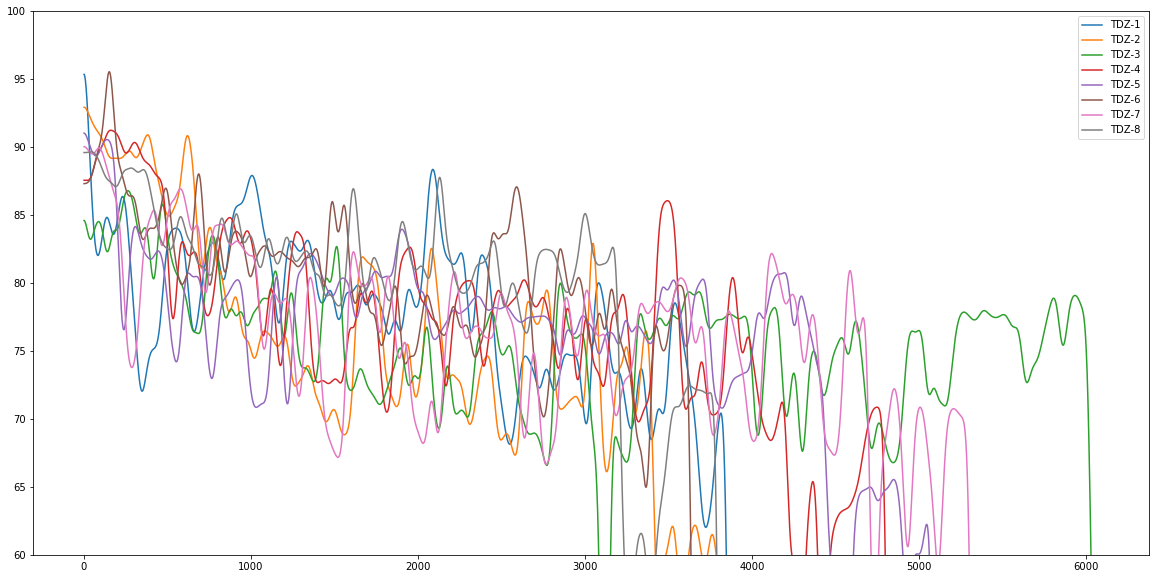

In [87]:
plt.figure(figsize=(20,10))
plt.plot(cadenceDF[['TDZ-1','TDZ-2','TDZ-3','TDZ-4','TDZ-5','TDZ-6','TDZ-7','TDZ-8']])
plt.legend(['TDZ-1','TDZ-2','TDZ-3','TDZ-4','TDZ-5','TDZ-6','TDZ-7','TDZ-8'])
plt.ylim([60,100])
plt.show()